In [ ]:
import pandas as pd
df = pd.read_csv("C:/Users/Usuario/Downloads/olist_consolidated_dataset.csv")

In [24]:
pd.set_option('display.max_columns', None)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_lat,customer_lng,customer_geo_city,customer_geo_state,seller_lat,seller_lng,seller_geo_city,seller_geo_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-23.574809,-46.587471,sao paulo,SP,-23.680114,-46.452454,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-23.574809,-46.587471,sao paulo,SP,-23.680114,-46.452454,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-23.574809,-46.587471,sao paulo,SP,-23.680114,-46.452454,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,-12.169860,-44.988369,barreiras,BA,-19.810119,-43.984727,belo horizonte,MG
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,-16.746337,-48.514624,vianopolis,GO,-21.362358,-48.232976,guariba,SP


In [31]:
import numpy as np
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
exog_vars = [col for col in numerical_cols if col != 'quantity']
df['quantity'] = 1
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
grouped = df.groupby(['product_category_name_english', 'order_purchase_timestamp']).agg(
    {'quantity': 'sum', **{var: 'mean' for var in exog_vars}}
).reset_index()
grouped

,product_category_name_english,order_purchase_timestamp,quantity,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,customer_lat,customer_lng,seller_lat,seller_lng
0,agro_industry_and_commerce,2017-01-23 07:03:04,2,1.5,21.99,8.72,35.0,380.0,1.0,125.0,20.0,4.0,13.0,3569.0,5409.0,1.0,1.0,61.42,4.0,-23.555477,-46.675485,-23.541942,-46.490955
1,agro_industry_and_commerce,2017-01-31 17:33:09,1,1.0,21.99,24.35,35.0,380.0,1.0,125.0,20.0,4.0,13.0,3569.0,64058.0,1.0,4.0,46.34,5.0,-5.059366,-42.753682,-23.541942,-46.490955
2,agro_industry_and_commerce,2017-02-05 19:35:10,1,1.0,21.99,14.52,35.0,380.0,1.0,125.0,20.0,4.0,13.0,3569.0,32223.0,1.0,1.0,36.51,3.0,-19.961706,-44.035239,-23.541942,-46.490955
3,agro_industry_and_commerce,2017-02-08 02:32:36,1,1.0,21.99,17.78,35.0,380.0,1.0,125.0,20.0,4.0,13.0,3569.0,74922.0,1.0,1.0,39.77,3.0,-16.759650,-49.225962,-23.541942,-46.490955
4,agro_industry_and_commerce,2017-02-12 20:42:26,1,1.0,92.90,20.97,40.0,628.0,1.0,2650.0,52.0,13.0,32.0,86990.0,79006.0,1.0,1.0,113.87,4.0,-20.479710,-54.640387,-23.489938,-51.788819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97789,watches_gifts,2018-08-27 09:08:47,1,1.0,48.00,7.60,58.0,600.0,3.0,250.0,16.0,2.0,11.0,5849.0,6602.0,1.0,1.0,55.60,5.0,-23.532663,-46.896040,-23.651115,-46.755211
97790,watches_gifts,2018-08-27 15:15:03,2,1.0,49.00,7.60,60.0,379.0,3.0,300.0,16.0,2.0,20.0,5849.0,18071.0,1.5,1.0,28.30,5.0,-23.471754,-47.506444,-23.651115,-46.755211
97791,watches_gifts,2018-08-28 14:37:52,1,1.0,59.00,7.67,54.0,257.0,5.0,200.0,16.0,2.0,20.0,5849.0,4538.0,1.0,1.0,66.67,5.0,-23.587027,-46.680540,-23.651115,-46.755211
97792,watches_gifts,2018-08-29 09:14:11,1,1.0,99.00,7.95,46.0,531.0,6.0,300.0,16.0,2.0,20.0,5849.0,13184.0,1.0,1.0,106.95,1.0,-22.862988,-47.218246,-23.651115,-46.755211


In [ ]:
import pandas as pd

df['cantidad'] = 1  # Columna para contar ventas
columnas_numericas = df.select_dtypes(include=np.number).columns.tolist()
variables_exogenas = [col for col in columnas_numericas if col != 'cantidad']


# 2. Calcular días de venta por producto
dias_venta_producto = df.groupby('product_category_name_english')['order_purchase_timestamp'].apply(
    lambda x: pd.to_datetime(x).dt.date.nunique()
).reset_index()
dias_venta_producto.columns = ['categoria_producto', 'dias_venta']


In [52]:
dias_venta_producto

,categoria_producto,dias_venta
0,agro_industry_and_commerce,144
1,air_conditioning,198
2,art,153
3,arts_and_craftmanship,21
4,audio,235
...,...,...
66,stationery,517
67,tablets_printing_image,69
68,telephony,588
69,toys,590


In [55]:
productos_pocos_dias = dias_venta_producto[dias_venta_producto['dias_venta'] > 45]
productos_pocos_dias

,categoria_producto,dias_venta
0,agro_industry_and_commerce,144
1,air_conditioning,198
2,art,153
4,audio,235
5,auto,582
6,baby,562
7,bed_bath_table,598
8,books_general_interest,307
9,books_imported,51
10,books_technical,172


In [ ]:
import numpy as np
import pandas as pd

df['cantidad'] = 1  
columnas_numericas = df.select_dtypes(include=np.number).columns.tolist()
variables_exogenas = [col for col in columnas_numericas if col != 'cantidad']
dias_venta = df.groupby('product_category_name_english')['order_purchase_timestamp'].apply(
    lambda x: pd.to_datetime(x).dt.date.nunique()
).reset_index(name='dias_venta')

productos_mas_45_dias = dias_venta[dias_venta['dias_venta'] > 45]
resultado_final = df[df['product_category_name_english'].isin(
    productos_mas_45_dias['product_category_name_english']
)].groupby(
    ['product_category_name_english', pd.to_datetime(df['order_purchase_timestamp']).dt.date]
).agg(
    {'cantidad': 'sum', **{var: 'mean' for var in variables_exogenas}}
).reset_index()

resultado_final.columns = [
    'categoria_producto', 
    'fecha_venta', 
    'total_ventas', 
    *[f'promedio_{var}' for var in variables_exogenas]
]

In [57]:
resultado_final

,categoria_producto,fecha_venta,total_ventas,promedio_order_item_id,promedio_price,promedio_freight_value,promedio_product_name_lenght,promedio_product_description_lenght,promedio_product_photos_qty,promedio_product_weight_g,promedio_product_length_cm,promedio_product_height_cm,promedio_product_width_cm,promedio_seller_zip_code_prefix,promedio_customer_zip_code_prefix,promedio_payment_sequential,promedio_payment_installments,promedio_payment_value,promedio_review_score,promedio_customer_lat,promedio_customer_lng,promedio_seller_lat,promedio_seller_lng,promedio_quantity
0,agro_industry_and_commerce,2017-01-23,2,1.5,21.990000,8.720000,35.000000,380.000000,1.0,125.000000,20.000000,4.0,13.0,3569.000000,5409.000000,1.000000,1.0,61.420000,4.000000,-23.555477,-46.675485,-23.541942,-46.490955,1.0
1,agro_industry_and_commerce,2017-01-31,1,1.0,21.990000,24.350000,35.000000,380.000000,1.0,125.000000,20.000000,4.0,13.0,3569.000000,64058.000000,1.000000,4.0,46.340000,5.000000,-5.059366,-42.753682,-23.541942,-46.490955,1.0
2,agro_industry_and_commerce,2017-02-05,1,1.0,21.990000,14.520000,35.000000,380.000000,1.0,125.000000,20.000000,4.0,13.0,3569.000000,32223.000000,1.000000,1.0,36.510000,3.000000,-19.961706,-44.035239,-23.541942,-46.490955,1.0
3,agro_industry_and_commerce,2017-02-08,1,1.0,21.990000,17.780000,35.000000,380.000000,1.0,125.000000,20.000000,4.0,13.0,3569.000000,74922.000000,1.000000,1.0,39.770000,3.000000,-16.759650,-49.225962,-23.541942,-46.490955,1.0
4,agro_industry_and_commerce,2017-02-12,1,1.0,92.900000,20.970000,40.000000,628.000000,1.0,2650.000000,52.000000,13.0,32.0,86990.000000,79006.000000,1.000000,1.0,113.870000,4.000000,-20.479710,-54.640387,-23.489938,-51.788819,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18175,watches_gifts,2018-08-25,3,1.0,129.850000,13.883333,49.333333,888.666667,2.0,386.000000,24.666667,8.0,20.0,11043.666667,36340.333333,1.000000,7.0,143.733333,3.666667,-23.106464,-48.193875,-22.676466,-47.111788,1.0
18176,watches_gifts,2018-08-26,2,1.5,93.000000,7.910000,58.000000,737.000000,3.0,350.000000,16.000000,2.0,20.0,5849.000000,2407.000000,1.000000,1.0,201.820000,4.000000,-23.485360,-46.624284,-23.651115,-46.755211,1.0
18177,watches_gifts,2018-08-27,3,1.0,48.666667,7.600000,59.333333,452.666667,3.0,283.333333,16.000000,2.0,17.0,5849.000000,14248.000000,1.333333,1.0,37.400000,5.000000,-23.492057,-47.302976,-23.651115,-46.755211,1.0
18178,watches_gifts,2018-08-28,1,1.0,59.000000,7.670000,54.000000,257.000000,5.0,200.000000,16.000000,2.0,20.0,5849.000000,4538.000000,1.000000,1.0,66.670000,5.000000,-23.587027,-46.680540,-23.651115,-46.755211,1.0


In [61]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def aplicar_dickey_fuller(serie):
    resultado = adfuller(serie.dropna())
    return {
        'ADF Statistic': resultado[0],
        'p-value': resultado[1],
        'Critical Values': resultado[4],
        'Estacionaria': resultado[1] < 0.05
    }

# Preparamos los resultados
resultados_adf = {}

for producto in resultado_final['categoria_producto'].unique():
    serie_temporal = resultado_final[resultado_final['categoria_producto'] == producto]['total_ventas']
    resultados_adf[producto] = aplicar_dickey_fuller(serie_temporal)

In [64]:
resultados_adf_df = pd.DataFrame(resultados_adf).T.reset_index()
resultados_adf_df.columns = ['Categoria_Producto', 'Estadistico_ADF', 'p_valor', 'Valores_Criticos', 'Es_Estacionaria']
resultados_adf_df

,Categoria_Producto,Estadistico_ADF,p_valor,Valores_Criticos,Es_Estacionaria
0,agro_industry_and_commerce,-11.975812,0.0,"{'1%': -3.4769274060112707, '5%': -2.881972632...",True
1,air_conditioning,-13.108094,0.0,"{'1%': -3.463987334463603, '5%': -2.8763259091...",True
2,art,-5.367774,0.000004,"{'1%': -3.4750180242954167, '5%': -2.881140802...",True
3,audio,-14.388498,0.0,"{'1%': -3.4586084859607156, '5%': -2.873972159...",True
4,auto,-2.757148,0.06466,"{'1%': -3.4419153151868147, '5%': -2.866641898...",False
5,baby,-4.030866,0.001257,"{'1%': -3.44218748274498, '5%': -2.86676172760...",True
6,bed_bath_table,-4.666331,0.000097,"{'1%': -3.4414632489439714, '5%': -2.866442840...",True
7,books_general_interest,-16.657388,0.0,"{'1%': -3.4519023023726696, '5%': -2.871032039...",True
8,books_imported,-7.13074,0.0,"{'1%': -3.568485864, '5%': -2.92135992, '10%':...",True
9,books_technical,-2.956846,0.039126,"{'1%': -3.4703698981001665, '5%': -2.879113849...",True


In [68]:
def diferenciar_serie(serie, max_diff=3):
    for d in range(1, max_diff + 1):
        serie_diff = serie.diff(d).dropna()
        resultado = adfuller(serie_diff)
        if resultado[1] < 0.05:
            return serie_diff, d
    return serie_diff, max_diff


In [96]:
productos_no_estacionarios = resultados_adf_df[resultados_adf_df['Es_Estacionaria'] == False]['Categoria_Producto']
productos_no_estacionarios

4                      auto
13    computers_accessories
23              electronics
29                     food
52           sports_leisure
Name: Categoria_Producto, dtype: object

In [72]:
series_diferenciadas = {}

for producto in productos_no_estacionarios:
    serie = resultado_final[resultado_final['categoria_producto'] == producto].set_index('fecha_venta')['total_ventas']
    serie_diff, orden_diff = diferenciar_serie(serie)
    series_diferenciadas[f'{producto}_diff{orden_diff}'] = serie_diff
    print(f"{producto} requirió {orden_diff} diferenciación(es)")

auto requirió 1 diferenciación(es)
computers_accessories requirió 1 diferenciación(es)
electronics requirió 1 diferenciación(es)
food requirió 1 diferenciación(es)
sports_leisure requirió 1 diferenciación(es)


In [73]:
def preparar_exogenas(producto, df_original, df_diff=None):
    # Seleccionar variables exógenas para este producto
    mask = df_original['categoria_producto'] == producto
    exog_data = df_original.loc[mask, [col for col in df_original.columns if col.startswith('promedio_')]]
    
    # Si tenemos datos diferenciados, alinear índices
    if df_diff is not None:
        diff_series = df_diff[f'{producto}_diff'].dropna()
        exog_data = exog_data.loc[diff_series.index]
    
    return exog_data

# Diccionario para almacenar modelos
modelos_sarimax = {}



Modelando: agro_industry_and_commerce
Error en modelado: exog contains inf or nans

Modelando: air_conditioning
Error en modelado: exog contains inf or nans

Modelando: art
Error en modelado: exog contains inf or nans

Modelando: audio
Error en modelado: exog contains inf or nans

Modelando: auto


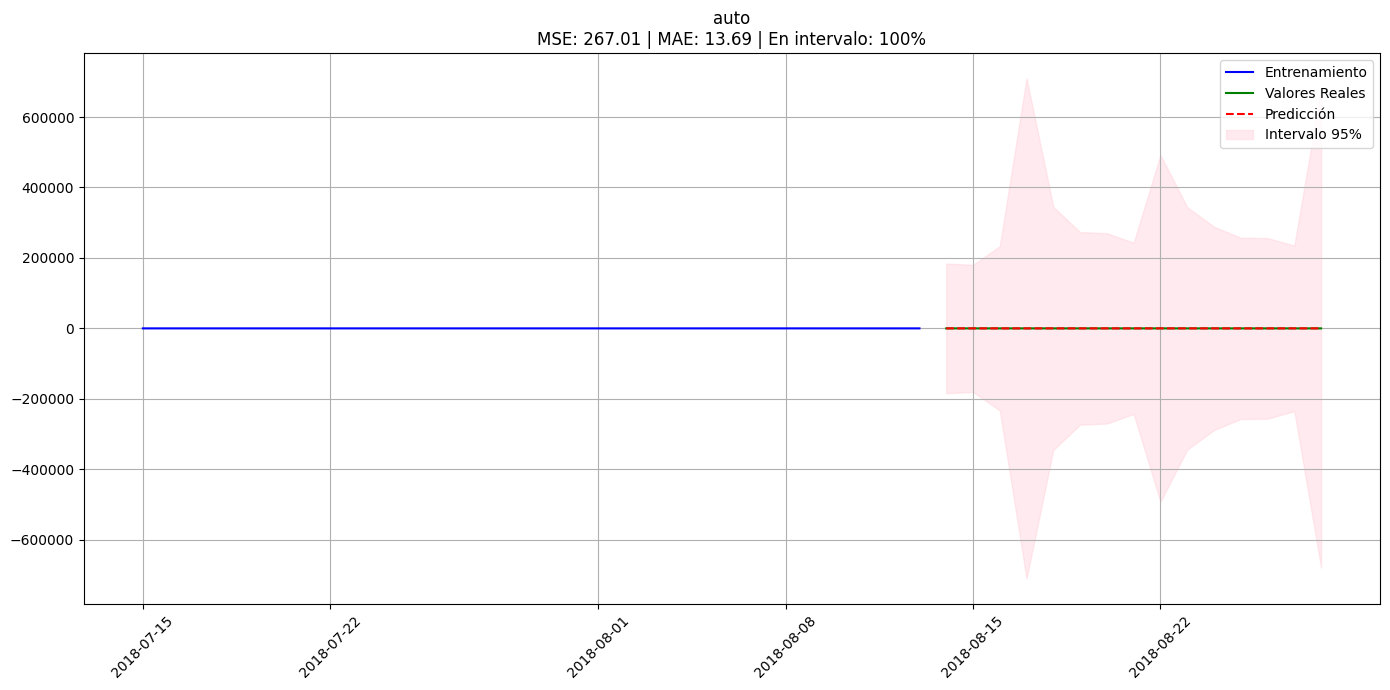


Modelando: baby


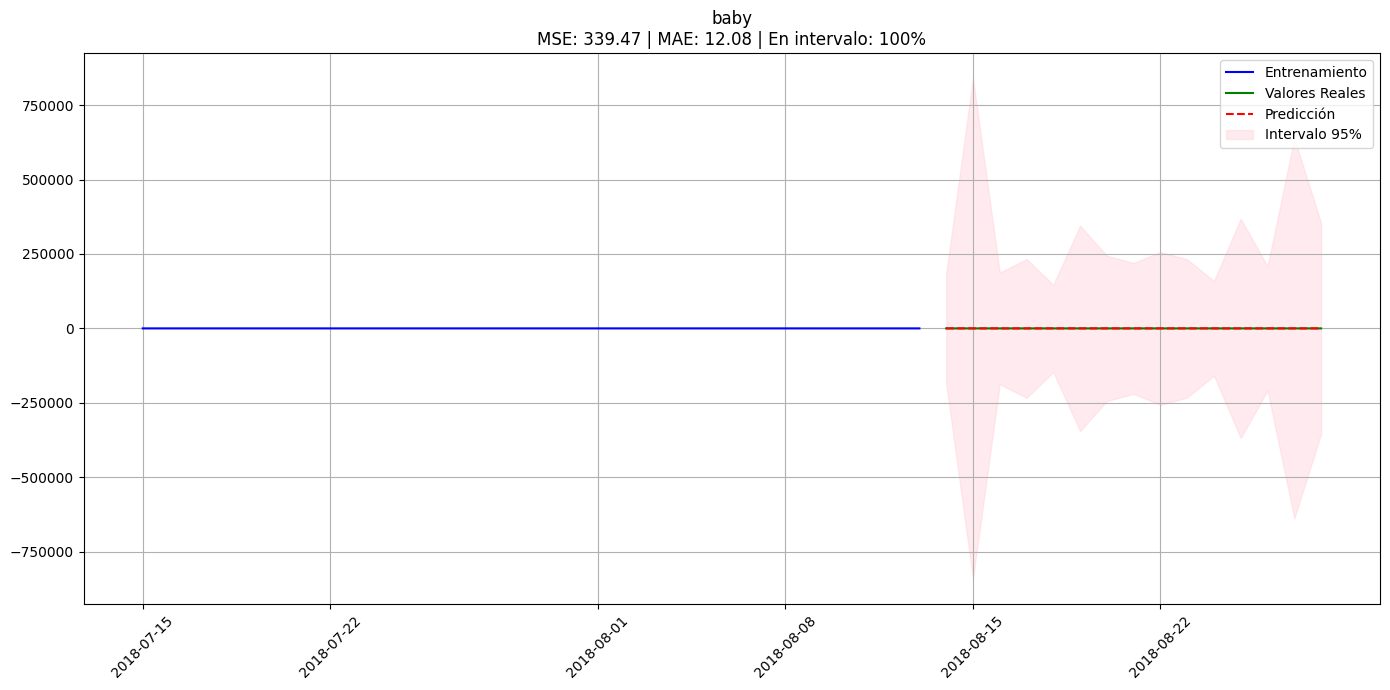


Modelando: bed_bath_table


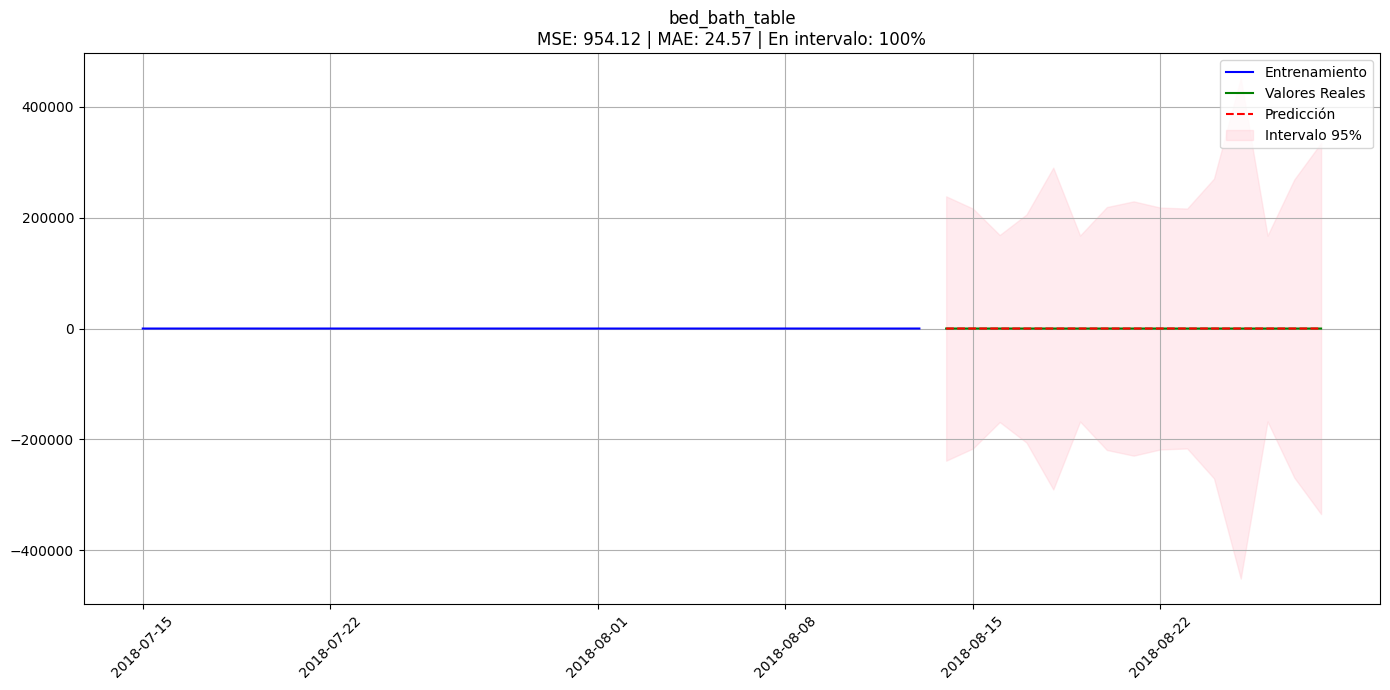


Modelando: books_general_interest
Error en modelado: exog contains inf or nans

Modelando: books_imported
Error en modelado: exog contains inf or nans

Modelando: books_technical
Error en modelado: exog contains inf or nans

Modelando: christmas_supplies
Error en modelado: exog contains inf or nans

Modelando: cine_photo
Error en modelado: exog contains inf or nans

Modelando: computers
Error en modelado: exog contains inf or nans

Modelando: computers_accessories


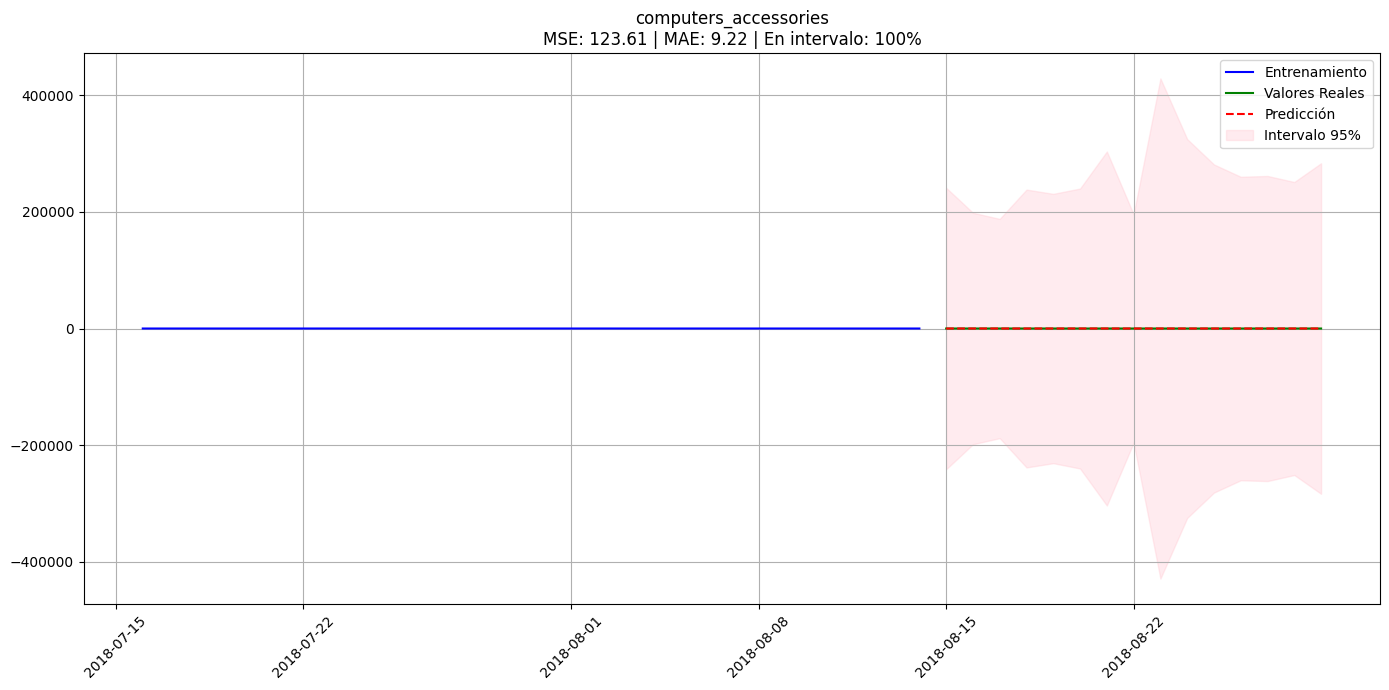


Modelando: consoles_games
Error en modelado: exog contains inf or nans

Modelando: construction_tools_construction


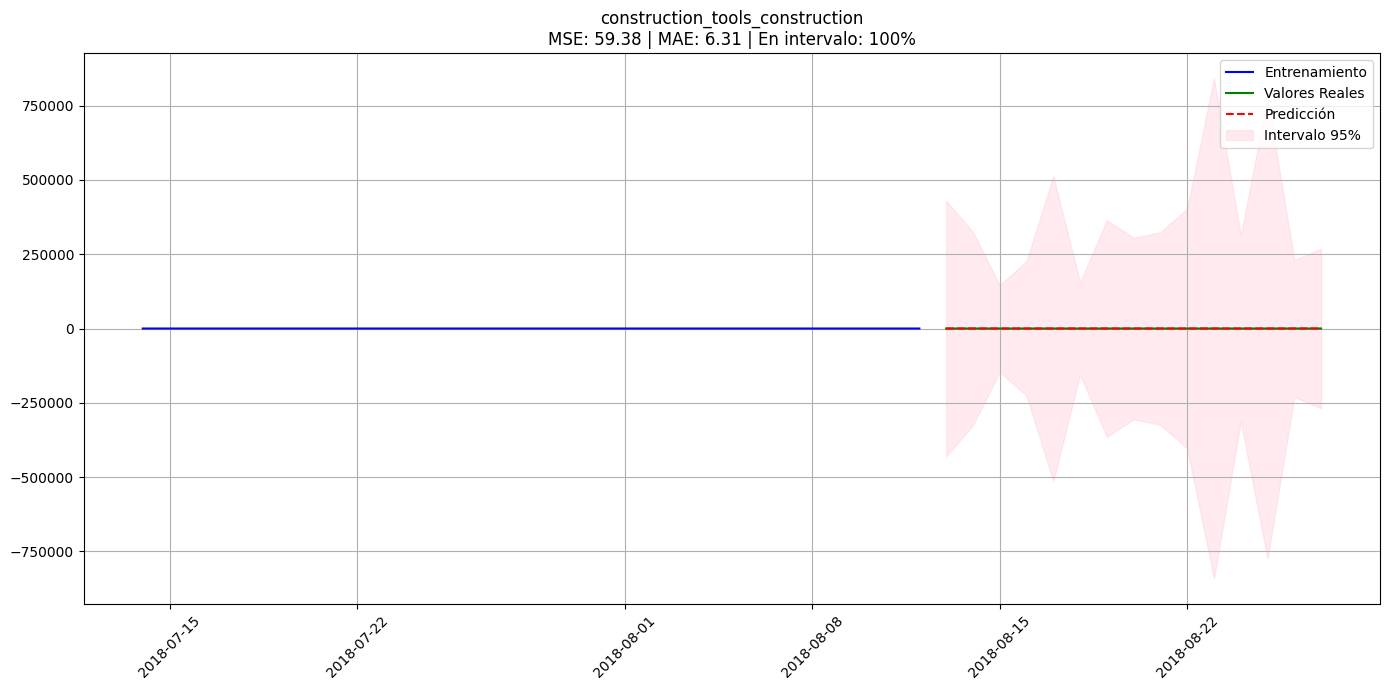


Modelando: construction_tools_lights
Error en modelado: exog contains inf or nans

Modelando: construction_tools_safety
Error en modelado: exog contains inf or nans

Modelando: cool_stuff
Error en modelado: Provided exogenous values are not of the appropriate shape. Required (15, 21), got (16, 21).

Modelando: costruction_tools_garden
Error en modelado: exog contains inf or nans

Modelando: costruction_tools_tools
Error en modelado: exog contains inf or nans

Modelando: drinks
Error en modelado: exog contains inf or nans

Modelando: dvds_blu_ray
Error en modelado: exog contains inf or nans

Modelando: electronics
Error en modelado: Provided exogenous values are not of the appropriate shape. Required (15, 21), got (16, 21).

Modelando: fashion_bags_accessories
Error en modelado: exog contains inf or nans

Modelando: fashion_male_clothing
Error en modelado: exog contains inf or nans

Modelando: fashion_shoes
Error en modelado: exog contains inf or nans

Modelando: fashion_underwear_beac

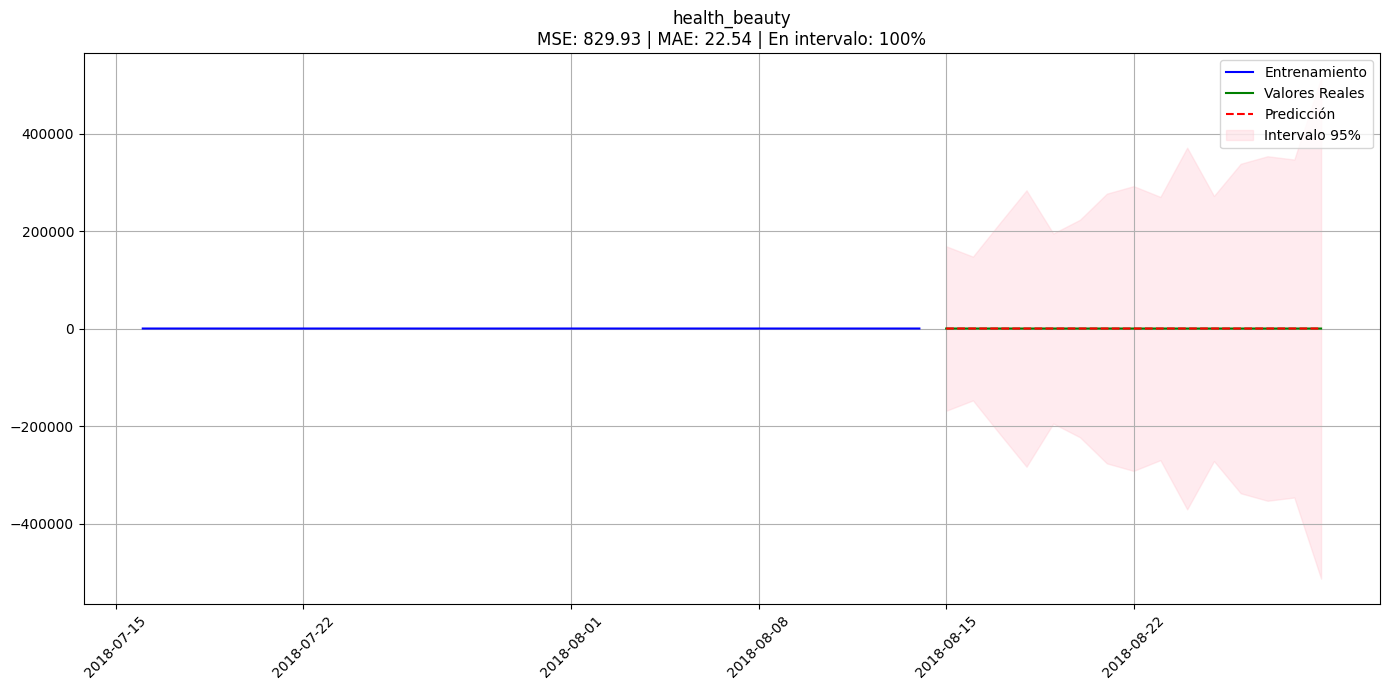


Modelando: home_appliances
Error en modelado: exog contains inf or nans

Modelando: home_appliances_2
Error en modelado: exog contains inf or nans

Modelando: home_confort
Error en modelado: exog contains inf or nans

Modelando: home_construction
Error en modelado: exog contains inf or nans

Modelando: housewares


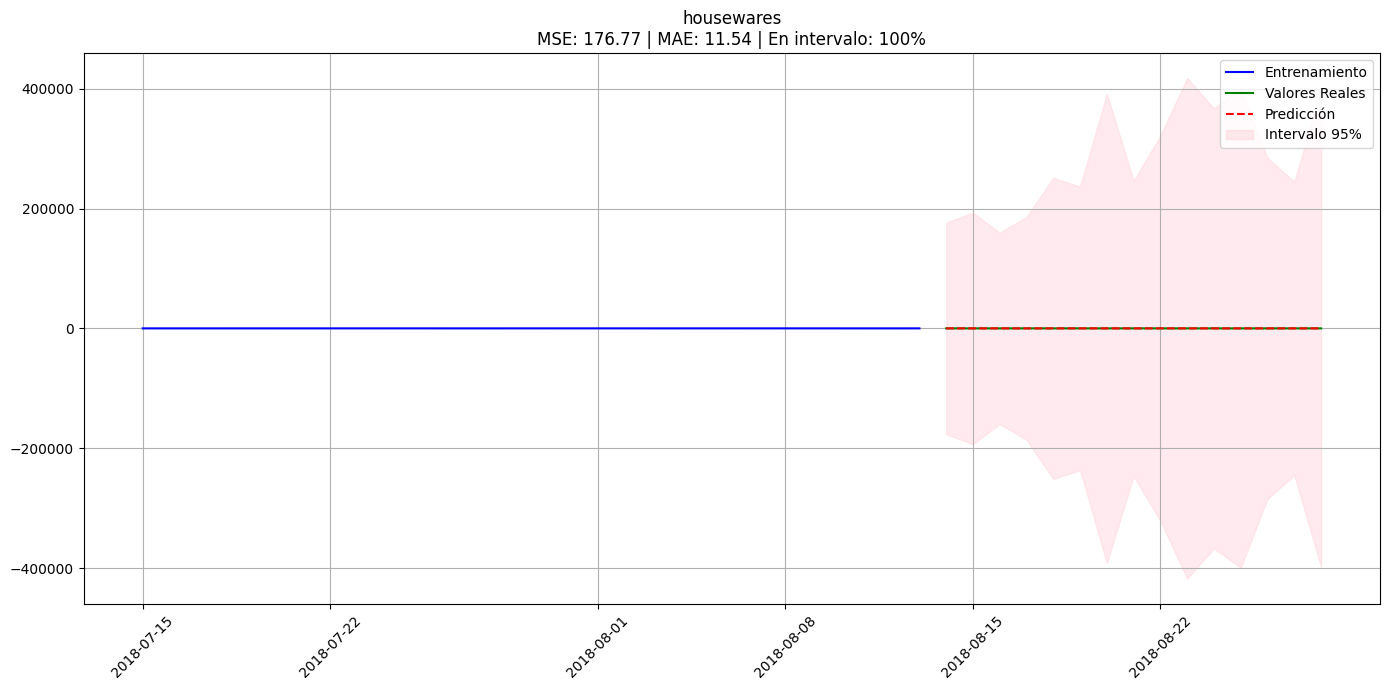


Modelando: industry_commerce_and_business
Error en modelado: exog contains inf or nans

Modelando: kitchen_dining_laundry_garden_furniture
Error en modelado: exog contains inf or nans

Modelando: luggage_accessories
Error en modelado: exog contains inf or nans

Modelando: market_place
Error en modelado: exog contains inf or nans

Modelando: musical_instruments
Error en modelado: exog contains inf or nans

Modelando: office_furniture
Error en modelado: exog contains inf or nans

Modelando: perfumery


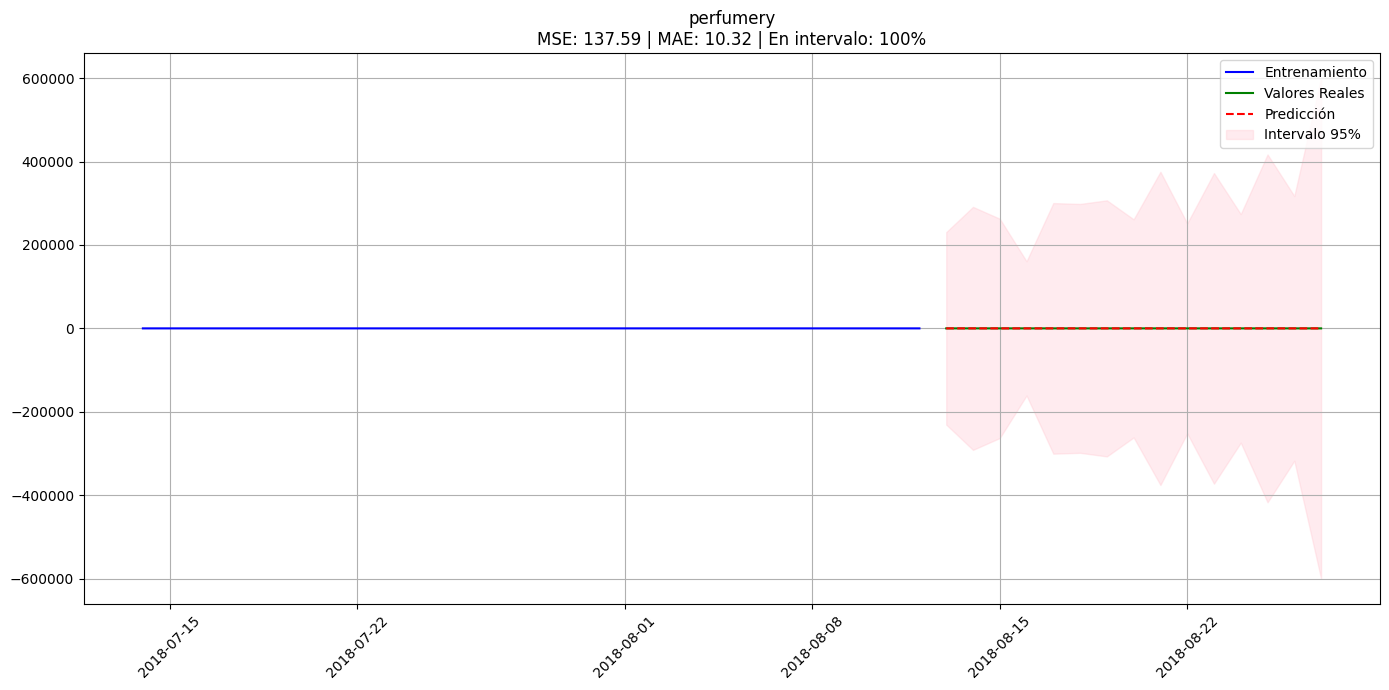


Modelando: pet_shop
Error en modelado: Provided exogenous values are not of the appropriate shape. Required (15, 21), got (16, 21).

Modelando: signaling_and_security
Error en modelado: exog contains inf or nans

Modelando: small_appliances
Error en modelado: exog contains inf or nans

Modelando: small_appliances_home_oven_and_coffee
Error en modelado: exog contains inf or nans

Modelando: sports_leisure


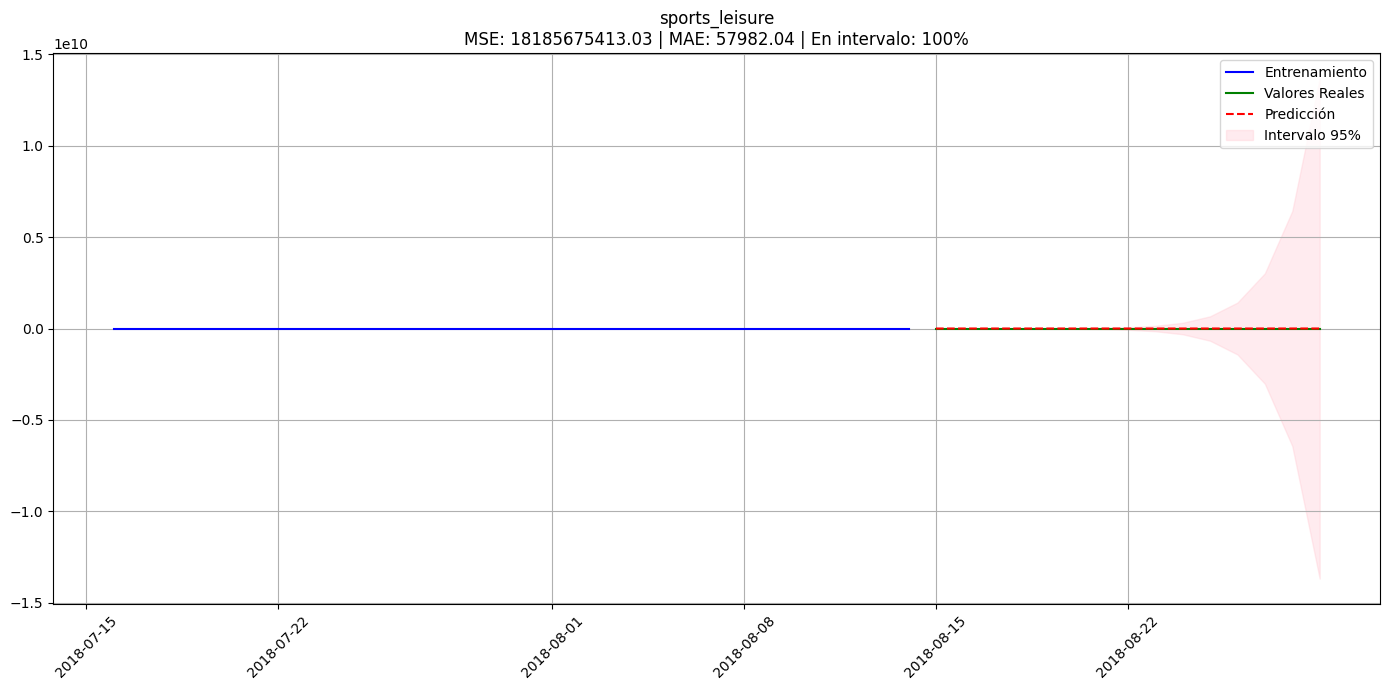


Modelando: stationery
Error en modelado: Provided exogenous values are not of the appropriate shape. Required (15, 21), got (16, 21).

Modelando: tablets_printing_image
Error en modelado: exog contains inf or nans

Modelando: telephony


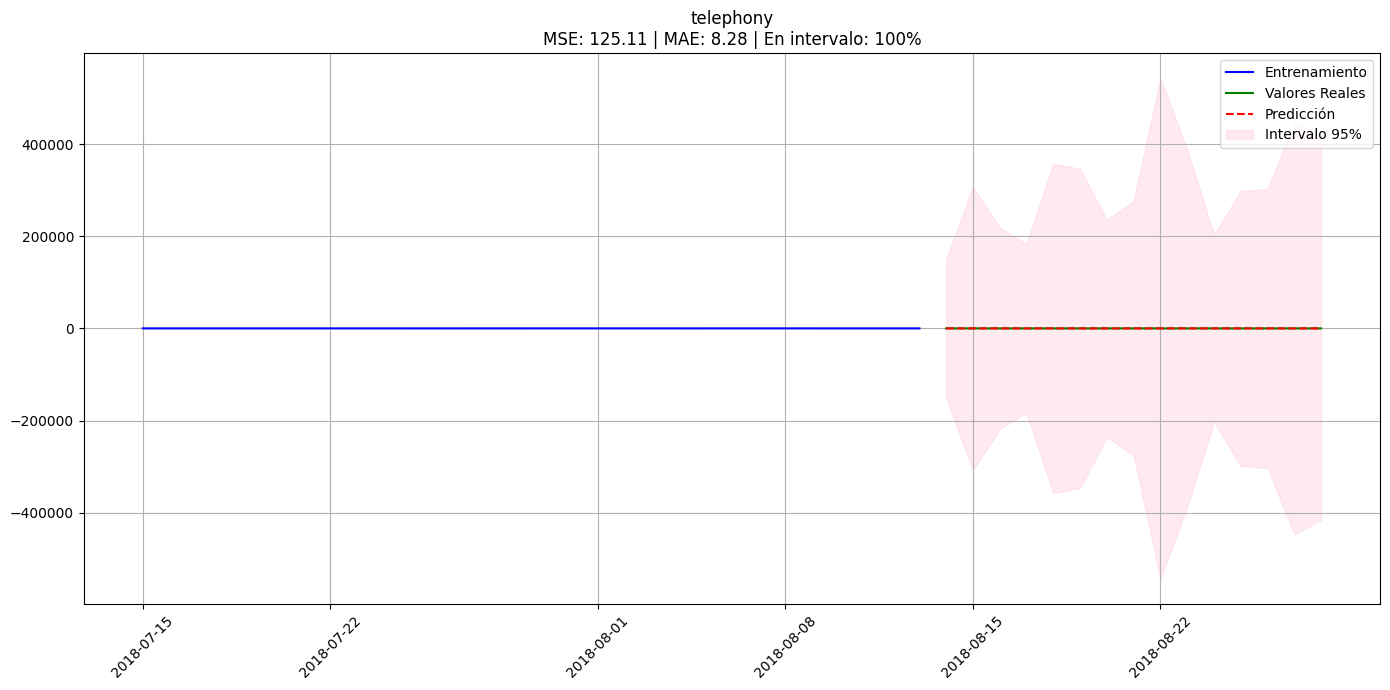


Modelando: toys
Error en modelado: Provided exogenous values are not of the appropriate shape. Required (15, 21), got (17, 21).

Modelando: watches_gifts


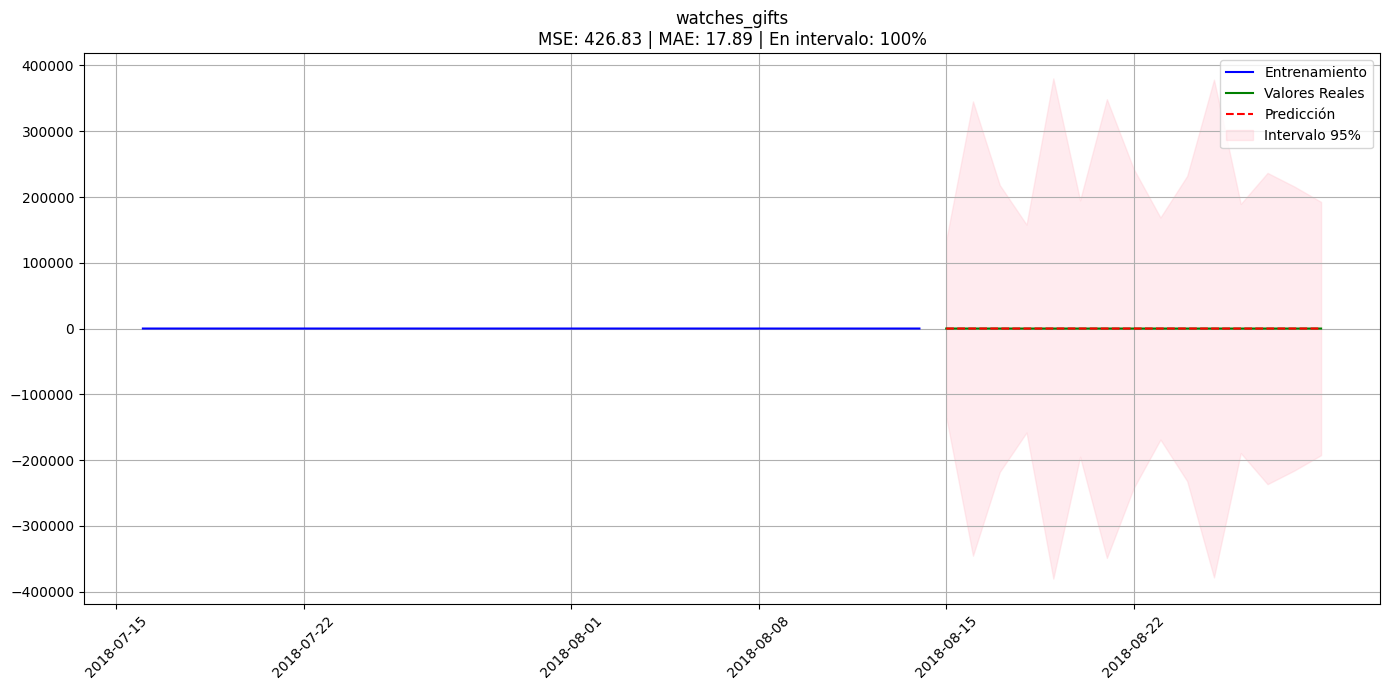


Resumen de modelado mejorado:
Modelos exitosos: 11
Modelos fallidos: 47

Errores encontrados:
error
exog contains inf or nans                                                                       41
Provided exogenous values are not of the appropriate shape. Required (15, 21), got (16, 21).     5
Provided exogenous values are not of the appropriate shape. Required (15, 21), got (17, 21).     1
Name: count, dtype: int64


In [89]:
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Configuración
DIAS_ENTRENAMIENTO = 30
DIAS_PRUEBA = 15
FREQ_ESTACIONAL = 'D'  # Frecuencia diaria explícita

# Función mejorada para preparar datos con frecuencia explícita
def preparar_serie_mejorada(producto, df_principal, df_diff=None):
    try:
        if df_diff is not None and f'{producto}_diff' in df_diff.columns:
            y = df_diff[f'{producto}_diff'].copy()
            d = 1
        else:
            mask = df_principal['categoria_producto'] == producto
            y = df_principal.loc[mask, ['fecha_venta', 'total_ventas']]
            y = y.set_index('fecha_venta')['total_ventas']
            d = 0

        y = y.asfreq(FREQ_ESTACIONAL)

        # Obtener exógenas
        exog_cols = [col for col in df_principal.columns if col.startswith('promedio_')]
        exog = df_principal.loc[mask, ['fecha_venta'] + exog_cols]
        exog = exog.set_index('fecha_venta').asfreq(FREQ_ESTACIONAL)
        exog = exog.replace([np.inf, -np.inf], np.nan).ffill().bfill()

        # Alinear y limpiar
        common_idx = y.index.intersection(exog.index)
        y = y.loc[common_idx]
        exog = exog.loc[common_idx]

        # Drop conjunto si hay valores nulos
        df_alineado = pd.concat([y, exog], axis=1).dropna()
        y = df_alineado.iloc[:, 0]
        exog = df_alineado.iloc[:, 1:]

        return y, exog, d

    except Exception as e:
        print(f"Error preparando {producto}: {str(e)}")
        return None, None, 0

# Suprimir advertencias específicas
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels.tsa.statespace.sarimax")

resultados_mejorados = {}

for producto in resultado_final['categoria_producto'].unique():
    print(f"\n{'='*50}\nModelando: {producto}\n{'='*50}")

    try:
        y, exog, d = preparar_serie_mejorada(
            producto,
            resultado_final,
            series_diferenciadas if producto in productos_no_estacionarios else None
        )

        if y is None or len(y) < (DIAS_ENTRENAMIENTO + DIAS_PRUEBA):
            raise ValueError(f"Datos insuficientes. Requeridos: {DIAS_ENTRENAMIENTO + DIAS_PRUEBA}, Disponibles: {len(y) if y is not None else 0}")

        # Ventana de datos
        y_window = y.iloc[-(DIAS_ENTRENAMIENTO + DIAS_PRUEBA):].asfreq(FREQ_ESTACIONAL)
        exog_window = exog.iloc[-(DIAS_ENTRENAMIENTO + DIAS_PRUEBA):].asfreq(FREQ_ESTACIONAL)

        y_train = y_window.iloc[:DIAS_ENTRENAMIENTO]
        y_test = y_window.iloc[DIAS_ENTRENAMIENTO:]
        exog_train = exog_window.iloc[:DIAS_ENTRENAMIENTO]
        exog_test = exog_window.iloc[DIAS_ENTRENAMIENTO:]

        # Validación explícita
        if not y_train.index.equals(exog_train.index):
            raise ValueError("Los índices de y_train y exog_train no están alineados.")

        # Modelo SARIMAX
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")

            model = SARIMAX(
                y_train,
                exog=exog_train,
                order=(1, d, 1),
                seasonal_order=(1, 0, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False,
                time_varying_regression=True,
                mle_regression=False,  # Necesario cuando se usan coeficientes variables en el tiempo
                freq=FREQ_ESTACIONAL
            )

            results = model.fit(disp=False, maxiter=100)

        # Predicción
        pred = results.get_forecast(steps=DIAS_PRUEBA, exog=exog_test)
        mse = mean_squared_error(y_test, pred.predicted_mean)
        mae = mean_absolute_error(y_test, pred.predicted_mean)
        en_intervalo = np.sum(
            (y_test >= pred.conf_int().iloc[:, 0]) &
            (y_test <= pred.conf_int().iloc[:, 1])
        ) / len(y_test)

        resultados_mejorados[producto] = {
            'modelo': results,
            'mse': mse,
            'mae': mae,
            'diferencia': d,
            'porcentaje_en_intervalo': en_intervalo,
            'status': 'success',
            'fechas_entrenamiento': f"{y_train.index[0].date()} a {y_train.index[-1].date()}",
            'fechas_prueba': f"{y_test.index[0].date()} a {y_test.index[-1].date()}"
        }

        # Visualización
        plt.figure(figsize=(14, 7))
        plt.plot(y_train.index, y_train, 'b-', label='Entrenamiento')
        plt.plot(y_test.index, y_test, 'g-', label='Valores Reales')
        plt.plot(y_test.index, pred.predicted_mean, 'r--', label='Predicción')
        plt.fill_between(
            y_test.index,
            pred.conf_int().iloc[:, 0],
            pred.conf_int().iloc[:, 1],
            color='pink', alpha=0.3, label='Intervalo 95%'
        )
        plt.title(f'{producto}\nMSE: {mse:.2f} | MAE: {mae:.2f} | En intervalo: {en_intervalo:.0%}')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error en modelado: {str(e)}")
        resultados_mejorados[producto] = {
            'error': str(e),
            'status': 'failed'
        }

# Análisis final
df_resultados_mejorados = pd.DataFrame.from_dict(resultados_mejorados, orient='index')

print("\nResumen de modelado mejorado:")
print(f"Modelos exitosos: {len(df_resultados_mejorados[df_resultados_mejorados['status'] == 'success'])}")
print(f"Modelos fallidos: {len(df_resultados_mejorados[df_resultados_mejorados['status'] == 'failed'])}")

if 'error' in df_resultados_mejorados.columns:
    print("\nErrores encontrados:")
    print(df_resultados_mejorados['error'].value_counts().head())

In [91]:
modelos_exitosos = df_resultados_mejorados[df_resultados_mejorados['status'] == 'success']

# Mostrar resumen ordenado por MAE (de menor a mayor)
modelos_ordenados = modelos_exitosos.sort_values(by='mae')
print("\n Modelos exitosos (ordenados por MAE):\n")
print(modelos_ordenados[['mse', 'mae', 'porcentaje_en_intervalo', 'fechas_entrenamiento', 'fechas_prueba']])


 Modelos exitosos (ordenados por MAE):

                                          mse           mae  \
construction_tools_construction  5.937560e+01      6.305596   
telephony                        1.251142e+02      8.281678   
computers_accessories            1.236105e+02      9.215704   
perfumery                        1.375853e+02     10.317290   
housewares                       1.767678e+02     11.537766   
baby                             3.394698e+02     12.078834   
auto                             2.670086e+02     13.690023   
watches_gifts                    4.268340e+02     17.885255   
health_beauty                    8.299324e+02     22.539309   
bed_bath_table                   9.541245e+02     24.574175   
sports_leisure                   1.818568e+10  57982.042825   

                                 porcentaje_en_intervalo  \
construction_tools_construction                      1.0   
telephony                                            1.0   
computers_accessories 

In [93]:
%matplotlib inline


 Visualizando modelo para: construction_tools_construction


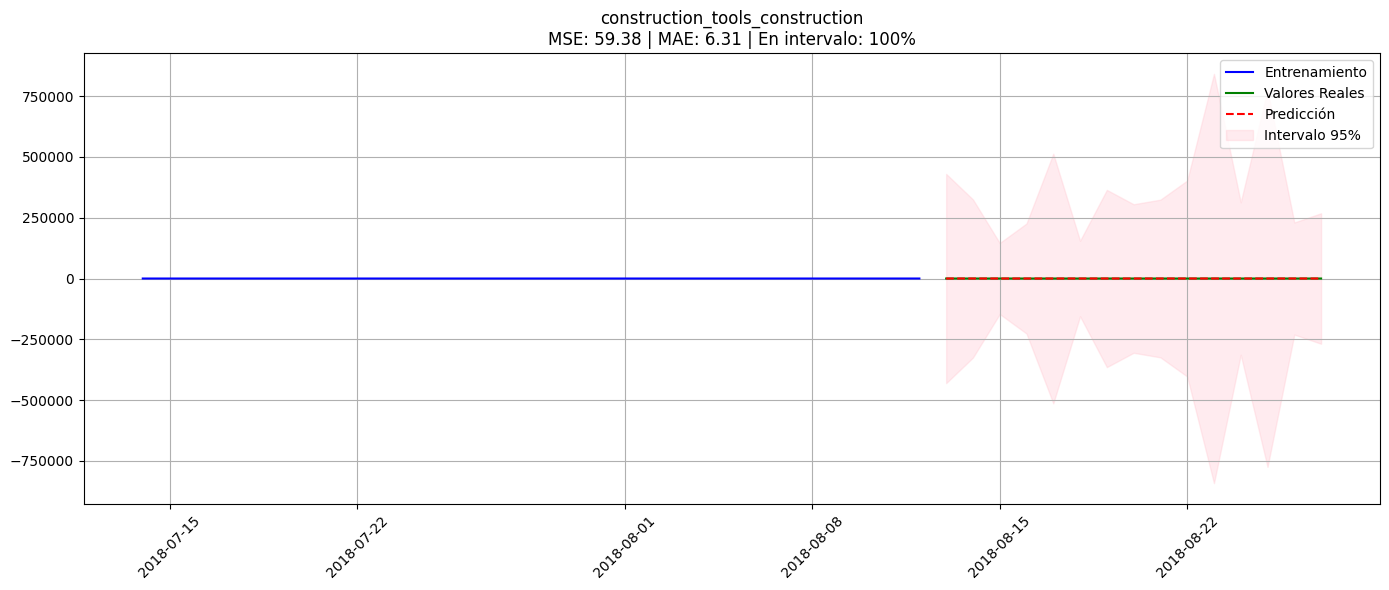


 Visualizando modelo para: telephony


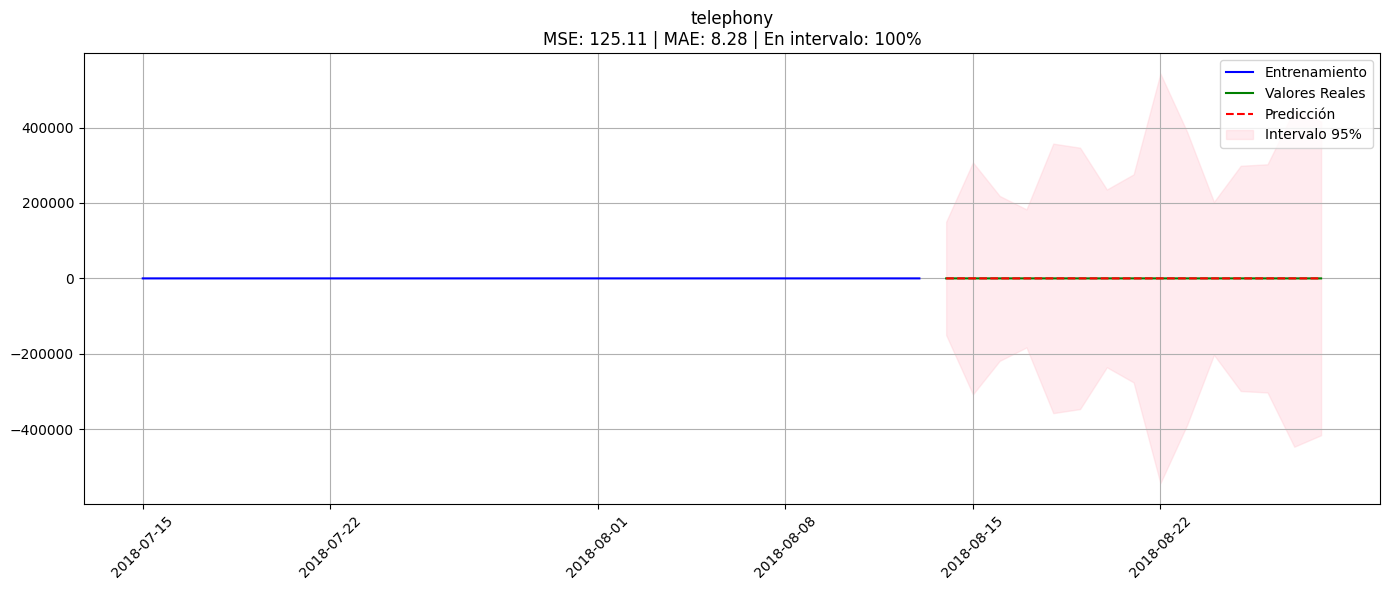


 Visualizando modelo para: computers_accessories


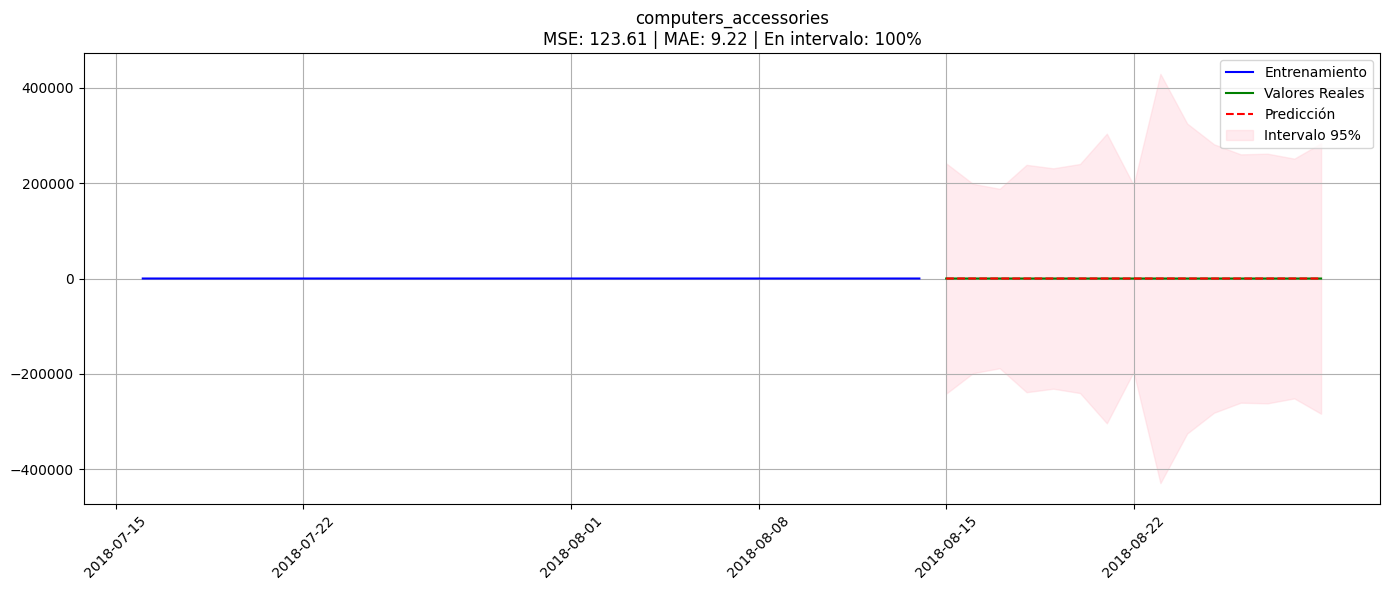

In [95]:
top_modelos = df_resultados_mejorados[df_resultados_mejorados['status'] == 'success'].sort_values(by='mae').head(3)

# Graficar resultados
for producto in top_modelos.index:
    print(f"\n Visualizando modelo para: {producto}")

    try:
        # Extraer datos desde el modelo original
        modelo = resultados_mejorados[producto]['modelo']
        d = resultados_mejorados[producto]['diferencia']

        # Preparar datos otra vez para este producto
        y, exog, _ = preparar_serie_mejorada(
            producto,
            resultado_final,
            series_diferenciadas if producto in productos_no_estacionarios else None
        )

        y_window = y.iloc[-(DIAS_ENTRENAMIENTO + DIAS_PRUEBA):]
        exog_window = exog.iloc[-(DIAS_ENTRENAMIENTO + DIAS_PRUEBA):]

        y_train = y_window.iloc[:DIAS_ENTRENAMIENTO]
        y_test = y_window.iloc[DIAS_ENTRENAMIENTO:]
        exog_test = exog_window.iloc[DIAS_ENTRENAMIENTO:]

        # Predecir otra vez con el modelo ya ajustado
        pred = modelo.get_forecast(steps=DIAS_PRUEBA, exog=exog_test)

        # Gráfico
        plt.figure(figsize=(14, 6))
        plt.plot(y_train.index, y_train, 'b-', label='Entrenamiento')
        plt.plot(y_test.index, y_test, 'g-', label='Valores Reales')
        plt.plot(y_test.index, pred.predicted_mean, 'r--', label='Predicción')
        plt.fill_between(
            y_test.index,
            pred.conf_int().iloc[:, 0],
            pred.conf_int().iloc[:, 1],
            color='pink', alpha=0.3, label='Intervalo 95%'
        )
        plt.title(f'{producto}\nMSE: {resultados_mejorados[producto]["mse"]:.2f} | MAE: {resultados_mejorados[producto]["mae"]:.2f} | En intervalo: {resultados_mejorados[producto]["porcentaje_en_intervalo"]:.0%}')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ Error al graficar {producto}: {str(e)}")

In [84]:
alto_error = df_resultados[(df_resultados['status'] == 'success') & 
                          (df_resultados['mse'] > df_resultados['mse'].median())]

# Re-modelar con parámetros diferentes
for producto in alto_error.index:
    # Usar auto_arima para optimización
    y_train, exog_train = # obtener datos de entrenamiento
    
    model = auto_arima(
        y_train,
        exogenous=exog_train,
        seasonal=True,
        m=7,
        trace=True,
        error_action='ignore'
    )
    # [Continuar con el proceso...]

SyntaxError: invalid syntax (2533849446.py, line 7)

In [81]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def preparar_exogenas_robusto(producto, df_original, df_diff=None):
    try:
        mask = df_original['categoria_producto'] == producto
        exog_data = df_original.loc[mask, [col for col in df_original.columns if col.startswith('promedio_')]]
        exog_data = exog_data.replace([np.inf, -np.inf], np.nan)
        exog_data = exog_data.fillna(exog_data.mean())
        if df_diff is not None and f'{producto}_diff' in df_diff.columns:
            diff_series = df_diff[f'{producto}_diff'].dropna()
            exog_data = exog_data.loc[diff_series.index]
            exog_data = exog_data[~exog_data.index.duplicated()]
            diff_series = diff_series[~diff_series.index.duplicated()]
            common_index = exog_data.index.intersection(diff_series.index)
            exog_data = exog_data.loc[common_index]
        
        return exog_data
    except Exception as e:
        print(f"Error preparando exógenas para {producto}: {str(e)}")
        return None

modelos_sarimax = {}
for producto in resultado_final['categoria_producto'].unique():
    print(f"\n{'='*50}\nModelando producto: {producto}\n{'='*50}")
    
    try:
        necesita_diff = producto in productos_no_estacionarios
        
        if necesita_diff and f'{producto}_diff' in series_diferenciadas.columns:
            y = series_diferenciadas[f'{producto}_diff'].dropna()
            exog = preparar_exogenas_robusto(producto, resultado_final, series_diferenciadas)
            d = 1  # Orden de diferenciación aplicado
        else:
            mask = resultado_final['categoria_producto'] == producto
            y = resultado_final.loc[mask].set_index('fecha_venta')['total_ventas'].dropna()
            exog = preparar_exogenas_robusto(producto, resultado_final)
            d = 0
        
        # Validación crítica de datos
        if len(y) < 10:
            raise ValueError(f"Serie temporal demasiado corta ({len(y)} observaciones)")
        
        if exog is None or len(exog) == 0:
            print("Sin variables exógenas válidas, usando modelo ARIMA puro")
            exog = None
        else:
            # Asegurar misma longitud
            common_idx = y.index.intersection(exog.index)
            y = y.loc[common_idx]
            exog = exog.loc[common_idx]
        
        # Dividir en train/test (80/20)
        split_idx = int(len(y) * 0.8)
        y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
        
        if exog is not None:
            exog_train, exog_test = exog.iloc[:split_idx], exog.iloc[split_idx:]
        else:
            exog_train, exog_test = None, None
        
        # Configuración automática de parámetros estacionales
        freq_estacional = 7  # Asumiendo patron semanal
        
        # Ajustar modelo SARIMAX con parámetros más robustos
        model = SARIMAX(y_train,
                       exog=exog_train,
                       order=(1, d, 1),  # (p,d,q)
                       seasonal_order=(0, 0, 0, freq_estacional),  # (P,D,Q,s) - inicialmente sin estacionalidad
                       enforce_stationarity=False,
                       enforce_invertibility=False,
                       initialization='approximate_diffuse')  # Más estable para series cortas
        
        results = model.fit(disp=False, maxiter=100)
        
        # Predicciones con manejo de errores
        try:
            pred = results.get_prediction(start=y_test.index[0],
                                        end=y_test.index[-1],
                                        exog=exog_test if exog is not None else None)
            mse = mean_squared_error(y_test, pred.predicted_mean)
        except:
            # Fallback: predecir solo un paso adelante
            pred = results.get_prediction(start=y_test.index[0],
                                        end=y_test.index[0],
                                        exog=exog_test.iloc[[0]] if exog is not None else None)
            mse = np.nan
        
        # Almacenar modelo
        modelos_sarimax[producto] = {
            'modelo': results,
            'mse': mse,
            'diferenciado': necesita_diff,
            'n_observaciones': len(y),
            'status': 'success'
        }
        
        # Visualización
        plt.figure(figsize=(12, 6))
        plt.plot(y_train.index, y_train, label='Entrenamiento')
        plt.plot(y_test.index, y_test, label='Real', color='green')
        
        if not np.isnan(mse):
            plt.plot(y_test.index, pred.predicted_mean, label='Predicción', color='red', linestyle='--')
        
        plt.title(f'SARIMAX - {producto} (MSE: {mse if not np.isnan(mse) else "N/A"})')
        plt.legend()
        plt.show()
        
        print(f"Modelo ajustado exitosamente para {producto}")
        print(results.summary())
        
    except Exception as e:
        print(f"Error en modelado de {producto}: {str(e)}")
        modelos_sarimax[producto] = {
            'error': str(e),
            'status': 'failed'
        }



Modelando producto: agro_industry_and_commerce
Error en modelado de agro_industry_and_commerce: zero-size array to reduction operation maximum which has no identity

Modelando producto: air_conditioning
Error en modelado de air_conditioning: zero-size array to reduction operation maximum which has no identity

Modelando producto: art
Error en modelado de art: zero-size array to reduction operation maximum which has no identity

Modelando producto: audio
Error en modelado de audio: zero-size array to reduction operation maximum which has no identity

Modelando producto: auto
Error en modelado de auto: zero-size array to reduction operation maximum which has no identity

Modelando producto: baby
Error en modelado de baby: zero-size array to reduction operation maximum which has no identity

Modelando producto: bed_bath_table
Error en modelado de bed_bath_table: zero-size array to reduction operation maximum which has no identity

Modelando producto: books_general_interest
Error en model

In [80]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Función mejorada para preparar datos exógenos
def preparar_exogenas_robusto(producto, df_original, df_diff=None):
    try:
        # Seleccionar variables exógenas para este producto
        mask = df_original['categoria_producto'] == producto
        exog_data = df_original.loc[mask, [col for col in df_original.columns if col.startswith('promedio_')]]
        
        # Manejo de infinitos y NaN
        exog_data = exog_data.replace([np.inf, -np.inf], np.nan)
        exog_data = exog_data.fillna(exog_data.mean())
        
        # Si tenemos datos diferenciados, alinear índices
        if df_diff is not None and f'{producto}_diff' in df_diff.columns:
            diff_series = df_diff[f'{producto}_diff'].dropna()
            exog_data = exog_data.loc[diff_series.index]
            
            # Asegurar alineación exacta
            exog_data = exog_data[~exog_data.index.duplicated()]
            diff_series = diff_series[~diff_series.index.duplicated()]
            common_index = exog_data.index.intersection(diff_series.index)
            exog_data = exog_data.loc[common_index]
        
        return exog_data
    except Exception as e:
        print(f"Error preparando exógenas para {producto}: {str(e)}")
        return None

# Diccionario para almacenar modelos (versión mejorada)
modelos_sarimax = {}

# Iterar por cada producto con manejo de errores mejorado
for producto in resultado_final['categoria_producto'].unique():
    print(f"\n{'='*50}\nModelando producto: {producto}\n{'='*50}")
    
    try:
        # Verificar si necesitó diferenciación
        necesita_diff = producto in productos_no_estacionarios
        
        # Preparar serie temporal
        if necesita_diff and f'{producto}_diff' in series_diferenciadas.columns:
            y = series_diferenciadas[f'{producto}_diff'].dropna()
            exog = preparar_exogenas_robusto(producto, resultado_final, series_diferenciadas)
            d = 1  # Orden de diferenciación aplicado
        else:
            mask = resultado_final['categoria_producto'] == producto
            y = resultado_final.loc[mask].set_index('fecha_venta')['total_ventas'].dropna()
            exog = preparar_exogenas_robusto(producto, resultado_final)
            d = 0
        
        # Validación crítica de datos
        if len(y) < 10:
            raise ValueError(f"Serie temporal demasiado corta ({len(y)} observaciones)")
        
        if exog is None or len(exog) == 0:
            print("Sin variables exógenas válidas, usando modelo ARIMA puro")
            exog = None
        else:
            # Asegurar misma longitud
            common_idx = y.index.intersection(exog.index)
            y = y.loc[common_idx]
            exog = exog.loc[common_idx]
        
        # Dividir en train/test (80/20)
        split_idx = int(len(y) * 0.8)
        y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
        
        if exog is not None:
            exog_train, exog_test = exog.iloc[:split_idx], exog.iloc[split_idx:]
        else:
            exog_train, exog_test = None, None
        
        # Configuración automática de parámetros estacionales
        freq_estacional = 7  # Asumiendo patron semanal
        
        # Ajustar modelo SARIMAX con parámetros más robustos
        model = SARIMAX(y_train,
                       exog=exog_train,
                       order=(1, d, 1),  # (p,d,q)
                       seasonal_order=(0, 0, 0, freq_estacional),  # (P,D,Q,s) - inicialmente sin estacionalidad
                       enforce_stationarity=False,
                       enforce_invertibility=False,
                       initialization='approximate_diffuse')  # Más estable para series cortas
        
        results = model.fit(disp=False, maxiter=100)
        
        # Predicciones con manejo de errores
        try:
            pred = results.get_prediction(start=y_test.index[0],
                                        end=y_test.index[-1],
                                        exog=exog_test if exog is not None else None)
            mse = mean_squared_error(y_test, pred.predicted_mean)
        except:
            # Fallback: predecir solo un paso adelante
            pred = results.get_prediction(start=y_test.index[0],
                                        end=y_test.index[0],
                                        exog=exog_test.iloc[[0]] if exog is not None else None)
            mse = np.nan
        
        # Almacenar modelo
        modelos_sarimax[producto] = {
            'modelo': results,
            'mse': mse,
            'diferenciado': necesita_diff,
            'n_observaciones': len(y),
            'status': 'success'
        }
        
        # Visualización
        plt.figure(figsize=(12, 6))
        plt.plot(y_train.index, y_train, label='Entrenamiento')
        plt.plot(y_test.index, y_test, label='Real', color='green')
        
        if not np.isnan(mse):
            plt.plot(y_test.index, pred.predicted_mean, label='Predicción', color='red', linestyle='--')
        
        plt.title(f'SARIMAX - {producto} (MSE: {mse if not np.isnan(mse) else "N/A"})')
        plt.legend()
        plt.show()
        
        print(f"Modelo ajustado exitosamente para {producto}")
        print(results.summary())
        
    except Exception as e:
        print(f"Error en modelado de {producto}: {str(e)}")
        modelos_sarimax[producto] = {
            'error': str(e),
            'status': 'failed'
        }

# Resumen de modelado mejorado
print("\nResumen completo de modelado:")
resumen_modelos = pd.DataFrame.from_dict(modelos_sarimax, orient='index')

# Mostrar análisis de resultados
print("\nEstadísticas de éxito:")
print(resumen_modelos['status'].value_counts())

print("\nTop 5 mejores modelos (por MSE):")
print(resumen_modelos[resumen_modelos['status'] == 'success'].sort_values('mse').head(5))

print("\nPrincipales causas de error:")
print(resumen_modelos[resumen_modelos['status'] == 'failed']['error'].value_counts().head(5))


Modelando producto: agro_industry_and_commerce
Error en modelado de agro_industry_and_commerce: zero-size array to reduction operation maximum which has no identity

Modelando producto: air_conditioning
Error en modelado de air_conditioning: zero-size array to reduction operation maximum which has no identity

Modelando producto: art
Error en modelado de art: zero-size array to reduction operation maximum which has no identity

Modelando producto: audio
Error en modelado de audio: zero-size array to reduction operation maximum which has no identity

Modelando producto: auto
Error en modelado de auto: zero-size array to reduction operation maximum which has no identity

Modelando producto: baby
Error en modelado de baby: zero-size array to reduction operation maximum which has no identity

Modelando producto: bed_bath_table
Error en modelado de bed_bath_table: zero-size array to reduction operation maximum which has no identity

Modelando producto: books_general_interest
Error en model

KeyError: 'mse'

C:\Users\Usuario\AppData\Local\Temp\ipykernel_35740\3738828276.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat[exog_vars] = df_cat[exog_vars].fillna(method='ffill').fillna(method='bfill')


1

,product_category_name_english,requires_differencing,differencing_order,final_adf_pvalue
0,agro_industry_and_commerce,False,0,8.131660e-07
1,air_conditioning,False,0,2.568792e-08
2,art,False,0,2.802346e-04
3,audio,False,0,7.785402e-06
4,auto,True,1,1.518302e-12
5,baby,True,1,1.919982e-20
6,bed_bath_table,False,0,7.249344e-04
7,books_general_interest,False,0,1.862463e-12
8,books_imported,False,0,1.477566e-03
9,books_technical,False,0,3.241794e-02


In [ ]:
grouped = df.groupby(['product_category_name_english']).agg({'quantity': 'sum'}).reset_index()

productos_validos = []
series_por_producto = {}

for producto in grouped['product_category_name_english  '].unique():
    df_prod = grouped[grouped['product_category_name_english'] == producto].copy()
    df_prod = df_prod.set_index('order_purchase_timestamp').asfreq('D').fillna(0)

    dias_con_ventas = (df_prod['quantity'] > 0).sum()

    if dias_con_ventas >= 45:
        productos_validos.append(producto)
        series_por_producto[producto] = df_prod['quantity']

KeyError: "Column(s) ['quantity'] do not exist"

In [ ]:
# Renombrar columnas para compatibilidad con el código original
grouped = daily_sales.rename(columns={
    "product_category_name_english": "english_name",
    "date": "purchase_date"
})

productos_validos = []

for producto in grouped['english_name'].unique():
    df_prod = grouped[grouped['english_name'] == producto].copy()
    df_prod = df_prod.set_index('purchase_date').asfreq('D').fillna(0)

    # Contar días con ventas > 0
    dias_con_ventas = (df_prod['quantity'] > 0).sum()

    if dias_con_ventas >= 45:
        productos_validos.append(producto)

print(f"Productos válidos encontrados: {len(productos_validos)}")
print("Ejemplos:", productos_validos[:5])

In [ ]:
daily_sales = (
    df_sales.groupby(["product_category_name_english", df_sales["order_purchase_timestamp"].dt.date])
    .agg({"quantity": "sum"})
    .reset_index()
    .rename(columns={"order_purchase_timestamp": "date"})
)
product_days_sold = (
    daily_sales.groupby("product_category_name_english")["date"]
    .nunique()
    .reset_index(name="days_sold")
)
valid_products = product_days_sold[product_days_sold["days_sold"] >= 45]["product_category_name_english"]


In [ ]:

filtered_sales = daily_sales[daily_sales["product_category_name_english"].isin(valid_products)].copy()
valid_products.shape[0], filtered_sales["product_category_name_english"].unique()

(58,
 array(['agro_industry_and_commerce', 'air_conditioning', 'art', 'audio',
        'auto', 'baby', 'bed_bath_table', 'books_general_interest',
        'books_imported', 'books_technical', 'christmas_supplies',
        'cine_photo', 'computers', 'computers_accessories',
        'consoles_games', 'construction_tools_construction',
        'construction_tools_lights', 'construction_tools_safety',
        'cool_stuff', 'costruction_tools_garden',
        'costruction_tools_tools', 'drinks', 'dvds_blu_ray', 'electronics',
        'fashion_bags_accessories', 'fashion_male_clothing',
        'fashion_shoes', 'fashion_underwear_beach', 'fixed_telephony',
        'food', 'food_drink', 'furniture_bedroom', 'furniture_decor',
        'furniture_living_room', 'garden_tools', 'health_beauty',
        'home_appliances', 'home_appliances_2', 'home_confort',
        'home_construction', 'housewares',
        'industry_commerce_and_business',
        'kitchen_dining_laundry_garden_furniture', 'lugg

In [7]:
filtered_sales["date"] = pd.to_datetime(filtered_sales["date"])

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
valid_categories = filtered_sales["product_category_name_english"].unique()

differencing_info = []
for categoria in valid_categories:
    df_cat = filtered_sales[filtered_sales["product_category_name_english"] == categoria].copy()
    df_cat = df_cat.set_index("date").asfreq("D")
    df_cat["quantity"] = df_cat["quantity"].ffill()  # relleno hacia adelante

    ts = df_cat["quantity"]
    d = 0

    try:
        # Primera prueba ADF
        p_value = adfuller(ts.dropna())[1]

        while p_value > 0.05 and d < 2:  # permitir hasta una diferenciación de orden 2
            ts = ts.diff().dropna()
            d += 1
            p_value = adfuller(ts)[1]

        differencing_info.append({
            "product_category_name_english": categoria,
            "requires_differencing": d > 0,
            "differencing_order": d,
            "final_adf_pvalue": p_value
        })

    except Exception as e:
        print(f"Error con la categoría {categoria}: {e}")

# Convertir a DataFrame
differencing_df = pd.DataFrame(differencing_info)


,product_category_name_english,requires_differencing,differencing_order,final_adf_pvalue
0,agro_industry_and_commerce,False,0,8.131660e-07
1,air_conditioning,False,0,2.568792e-08
2,art,False,0,2.802346e-04
3,audio,False,0,7.785402e-06
4,auto,True,1,1.518302e-12
5,baby,True,1,1.919982e-20
6,bed_bath_table,False,0,7.249344e-04
7,books_general_interest,False,0,1.862463e-12
8,books_imported,False,0,1.477566e-03
9,books_technical,False,0,3.241794e-02


In [19]:
print(filtered_sales.columns.tolist())

['product_category_name_english', 'date', 'quantity']


In [ ]:

exog_vars = [ "payment_value", "review_score", "product_weight_g", "product_length_cm"]
series_con_exog = {}

for _, row in differencing_df.iterrows():
    categoria = row["product_category_name_english"]
    d = int(row["differencing_order"])
    
    df_cat = filtered_sales[filtered_sales["product_category_name_english"] == categoria].copy()
    df_cat = df_cat.set_index("date").asfreq("D")
    df_cat["quantity"] = df_cat["quantity"].ffill()
    
    # Forward fill y back fill para variables exógenas
for col in exog_vars:
        df_cat[col] = df_cat[col].ffill().bfill()
    
    # Aplicar diferenciación solo a la serie target
for _ in range(d):
        df_cat["quantity"] = df_cat["quantity"].diff()
    
df_cat = df_cat.dropna(subset=["quantity"])  # Eliminar NaNs luego de diferencia
df_cat["product_category_name_english"] = categoria
    
series_con_exog[categoria] = df_cat

# Unir todos los resultados para ver cómo queda
df_series_con_exog = pd.concat(series_con_exog.values())

# Mostrar un fragmento
df_series_con_exog.reset_index().head(10)

KeyError: 'payment_value'

In [12]:
import sklearn.model_selection as train_test_split

for categoria in differencing_df["product_category_name_english"].unique():
    df_cat = filtered_sales[filtered_sales["product_category_name_english"] == categoria].copy()
    df_cat = df_cat.set_index("date").asfreq("D")
    df_cat["quantity"] = df_cat["quantity"].ffill()  # corrección aquí

    if len(df_cat) >= 45:
        train = df_cat.iloc[:30]
        test = df_cat.iloc[30:45]
        train_test_split[categoria] = {"train": train, "test": test}

TypeError: 'module' object does not support item assignment